# GAIN

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

In [ ]:
df = pd.read_csv('/content/tab2img.csv')
df.head()

,Unnamed: 0,73,74.25,74.5,74.75,75,75.25,75.5,75.75,76,...,93.5,93.75,94,94.25,94.5,94.75,95,95.75,96.25,96.5
0,10.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 78 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  91 non-null     float64
 1   73          1 non-null      float64
 2   74.25       1 non-null      float64
 3   74.5        3 non-null      float64
 4   74.75       4 non-null      float64
 5   75          2 non-null      float64
 6   75.25       3 non-null      float64
 7   75.5        4 non-null      float64
 8   75.75       7 non-null      float64
 9   76          6 non-null      float64
 10  76.25       12 non-null     float64
 11  76.5        10 non-null     float64
 12  76.75       11 non-null     float64
 13  77          12 non-null     float64
 14  77.25       8 non-null      float64
 15  77.5        8 non-null      float64
 16  77.75       16 non-null     float64
 17  78          9 non-null      float64
 18  78.25       11 non-null     float64
 19  78.5        13 non-null     flo

In [ ]:
df.describe()

,Unnamed: 0,73,74.25,74.5,74.75,75,75.25,75.5,75.75,76,...,93.5,93.75,94,94.25,94.5,94.75,95,95.75,96.25,96.5
count,91.000000,1.0,1.000000,3.000000,4.000000,2.000000,3.000000,4.000000,7.000000,6.000000,...,2.000000,1.000000,2.000000,2.000000,1.0000,1.000000,2.000000,3.000000,2.000000,2.000000
mean,22.431319,0.2,326.318681,268.252005,458.833333,2927.070393,48.238916,8734.615727,832.269390,1067.640600,...,20.750000,88.799952,171.010673,67.085471,59.0625,136.459822,73.449118,60.718662,62.883537,38.278903
std,6.860927,NaN,NaN,223.073167,760.788956,1584.695104,43.573388,17058.273459,1169.109846,1697.047511,...,21.566757,NaN,0.103734,9.237402,NaN,NaN,32.213068,15.488156,17.692381,12.677135
min,10.250000,0.2,326.318681,16.458333,15.952381,1806.521739,8.400000,88.073395,15.000000,118.001055,...,5.500000,88.799952,170.937322,60.553642,59.0625,136.459822,50.671039,44.179104,50.373134,29.314815
25%,16.625000,0.2,326.318681,181.789773,85.613095,2366.796066,24.972368,146.151064,63.468424,155.367803,...,13.125000,88.799952,170.973997,63.819557,59.0625,136.459822,62.060079,53.637790,56.628336,33.796859
50%,22.500000,0.2,326.318681,347.121212,110.666667,2927.070393,41.544737,264.477366,429.250000,260.043694,...,20.750000,88.799952,171.010673,67.085471,59.0625,136.459822,73.449118,63.096476,62.883537,38.278903
75%,28.125000,0.2,326.318681,394.148841,483.886905,3487.344720,68.158375,8852.942028,984.432773,979.863484,...,28.375000,88.799952,171.047349,70.351386,59.0625,136.459822,84.838158,68.988441,69.138738,42.760947
max,35.250000,0.2,326.318681,441.176471,1598.047619,4047.619047,94.772013,34321.434780,3285.833333,4427.475905,...,36.000000,88.799952,171.084024,73.617301,59.0625,136.459822,96.227197,74.880406,75.393939,47.242991


In [ ]:
df_nans = df.loc[:, np.isnan(df).sum() > 0]
np.isnan(df_nans).sum() / df_nans.shape[0]

73       0.989011
74.25    0.989011
74.5     0.967033
74.75    0.956044
75       0.978022
           ...   
94.75    0.989011
95       0.978022
95.75    0.967033
96.25    0.978022
96.5     0.978022
Length: 77, dtype: float64

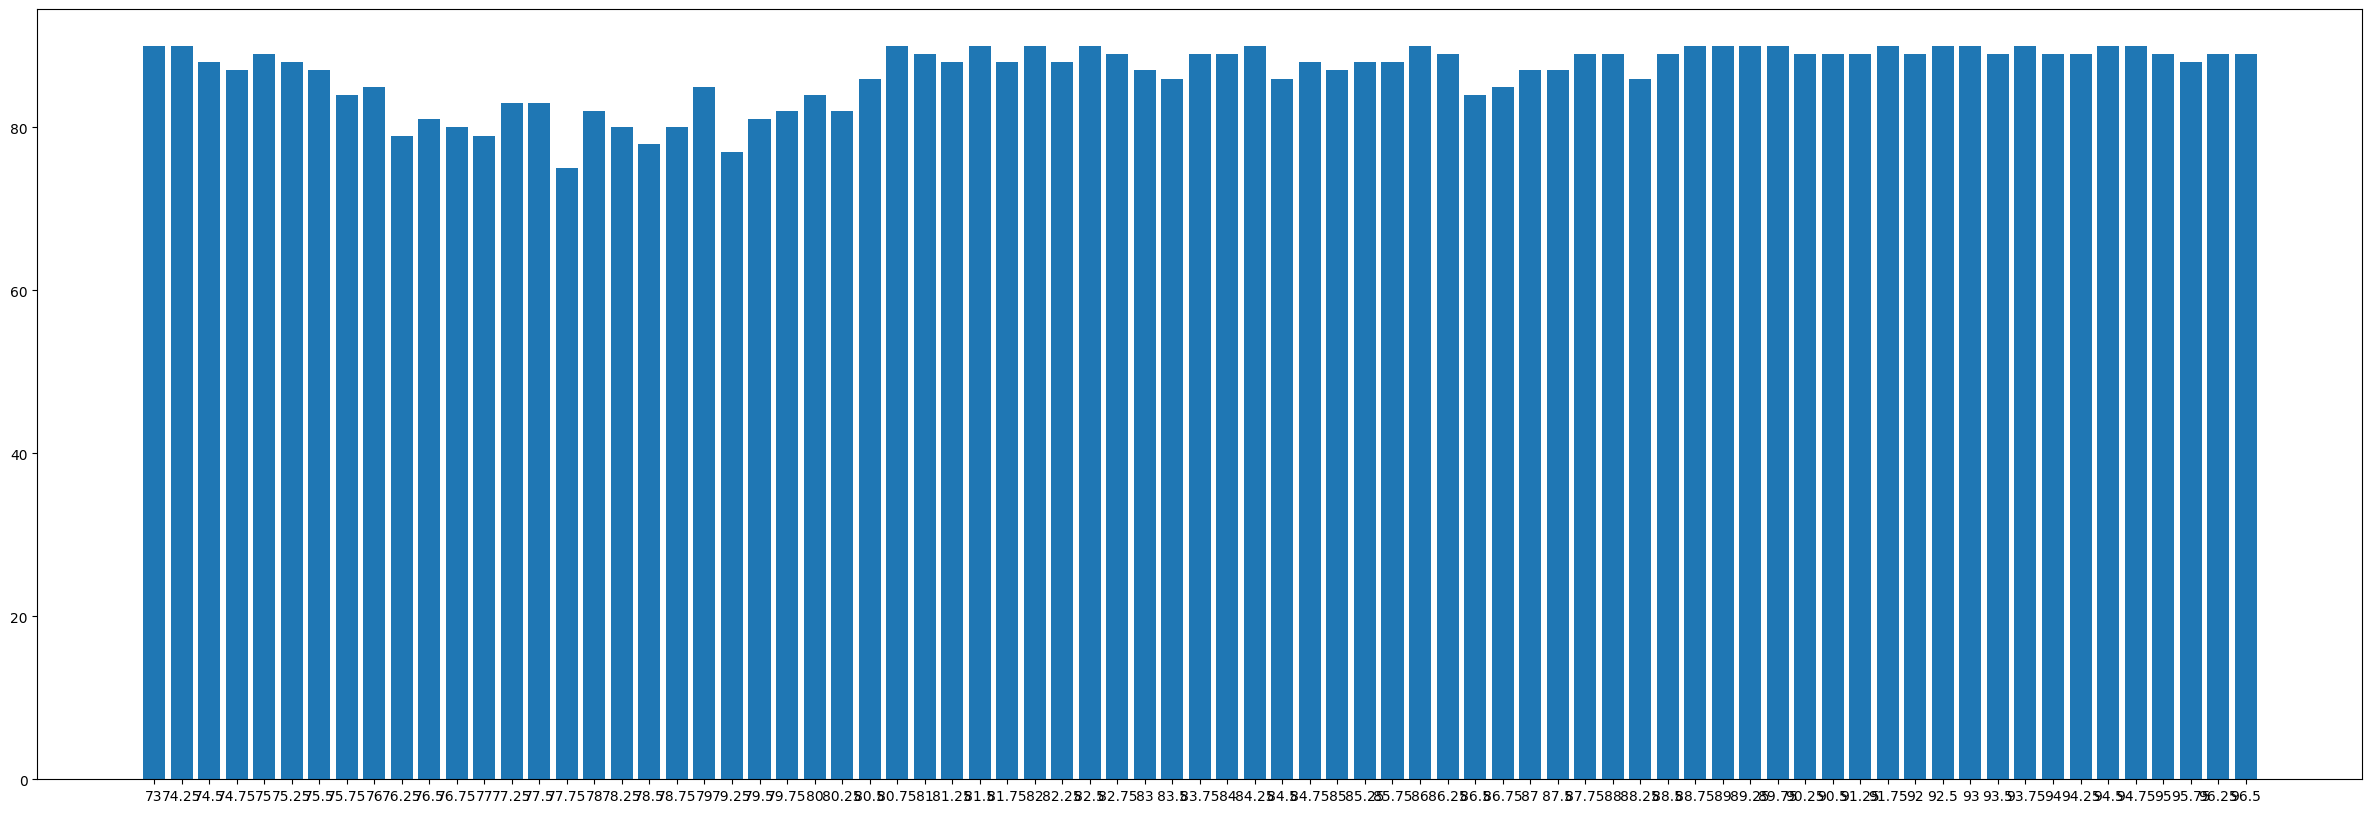

In [ ]:
columns = df_nans.columns
fig = plt.figure(figsize=(30, 10))
plt.bar(x=columns, height = np.isnan(df_nans).sum())
plt.show()

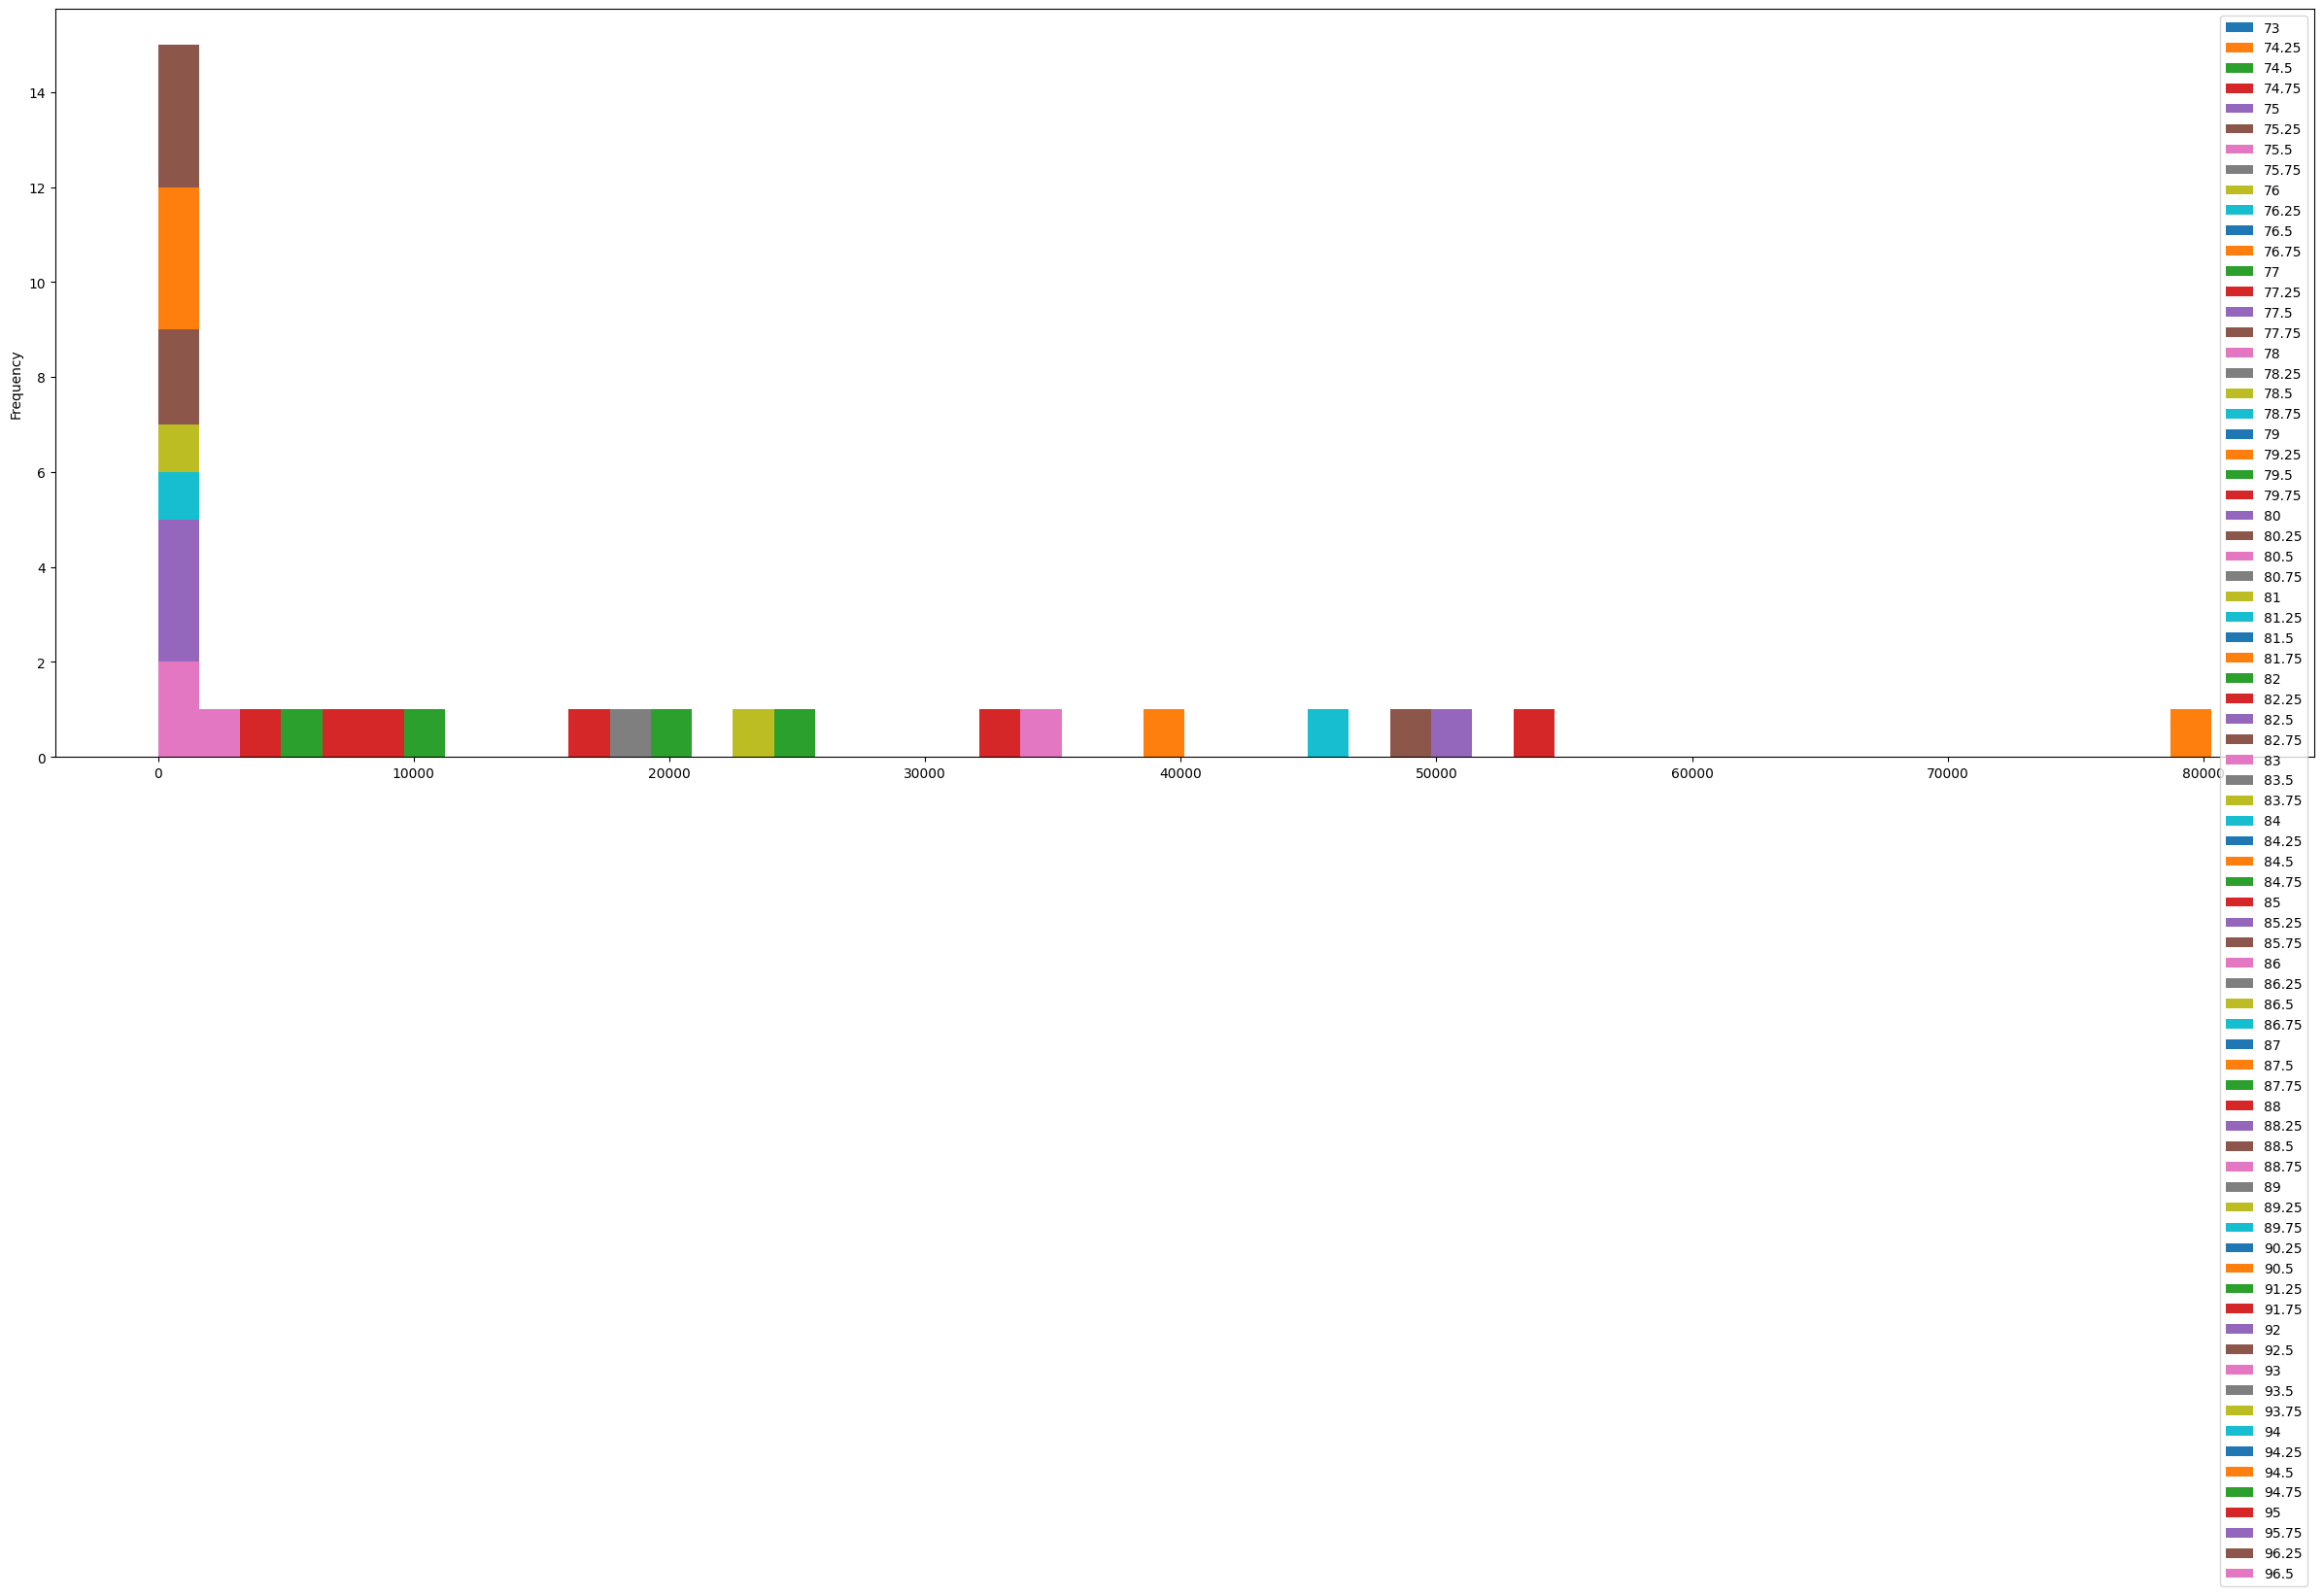

In [ ]:
df_nans.plot.hist(figsize=(30, 10), bins = 50)
plt.show()

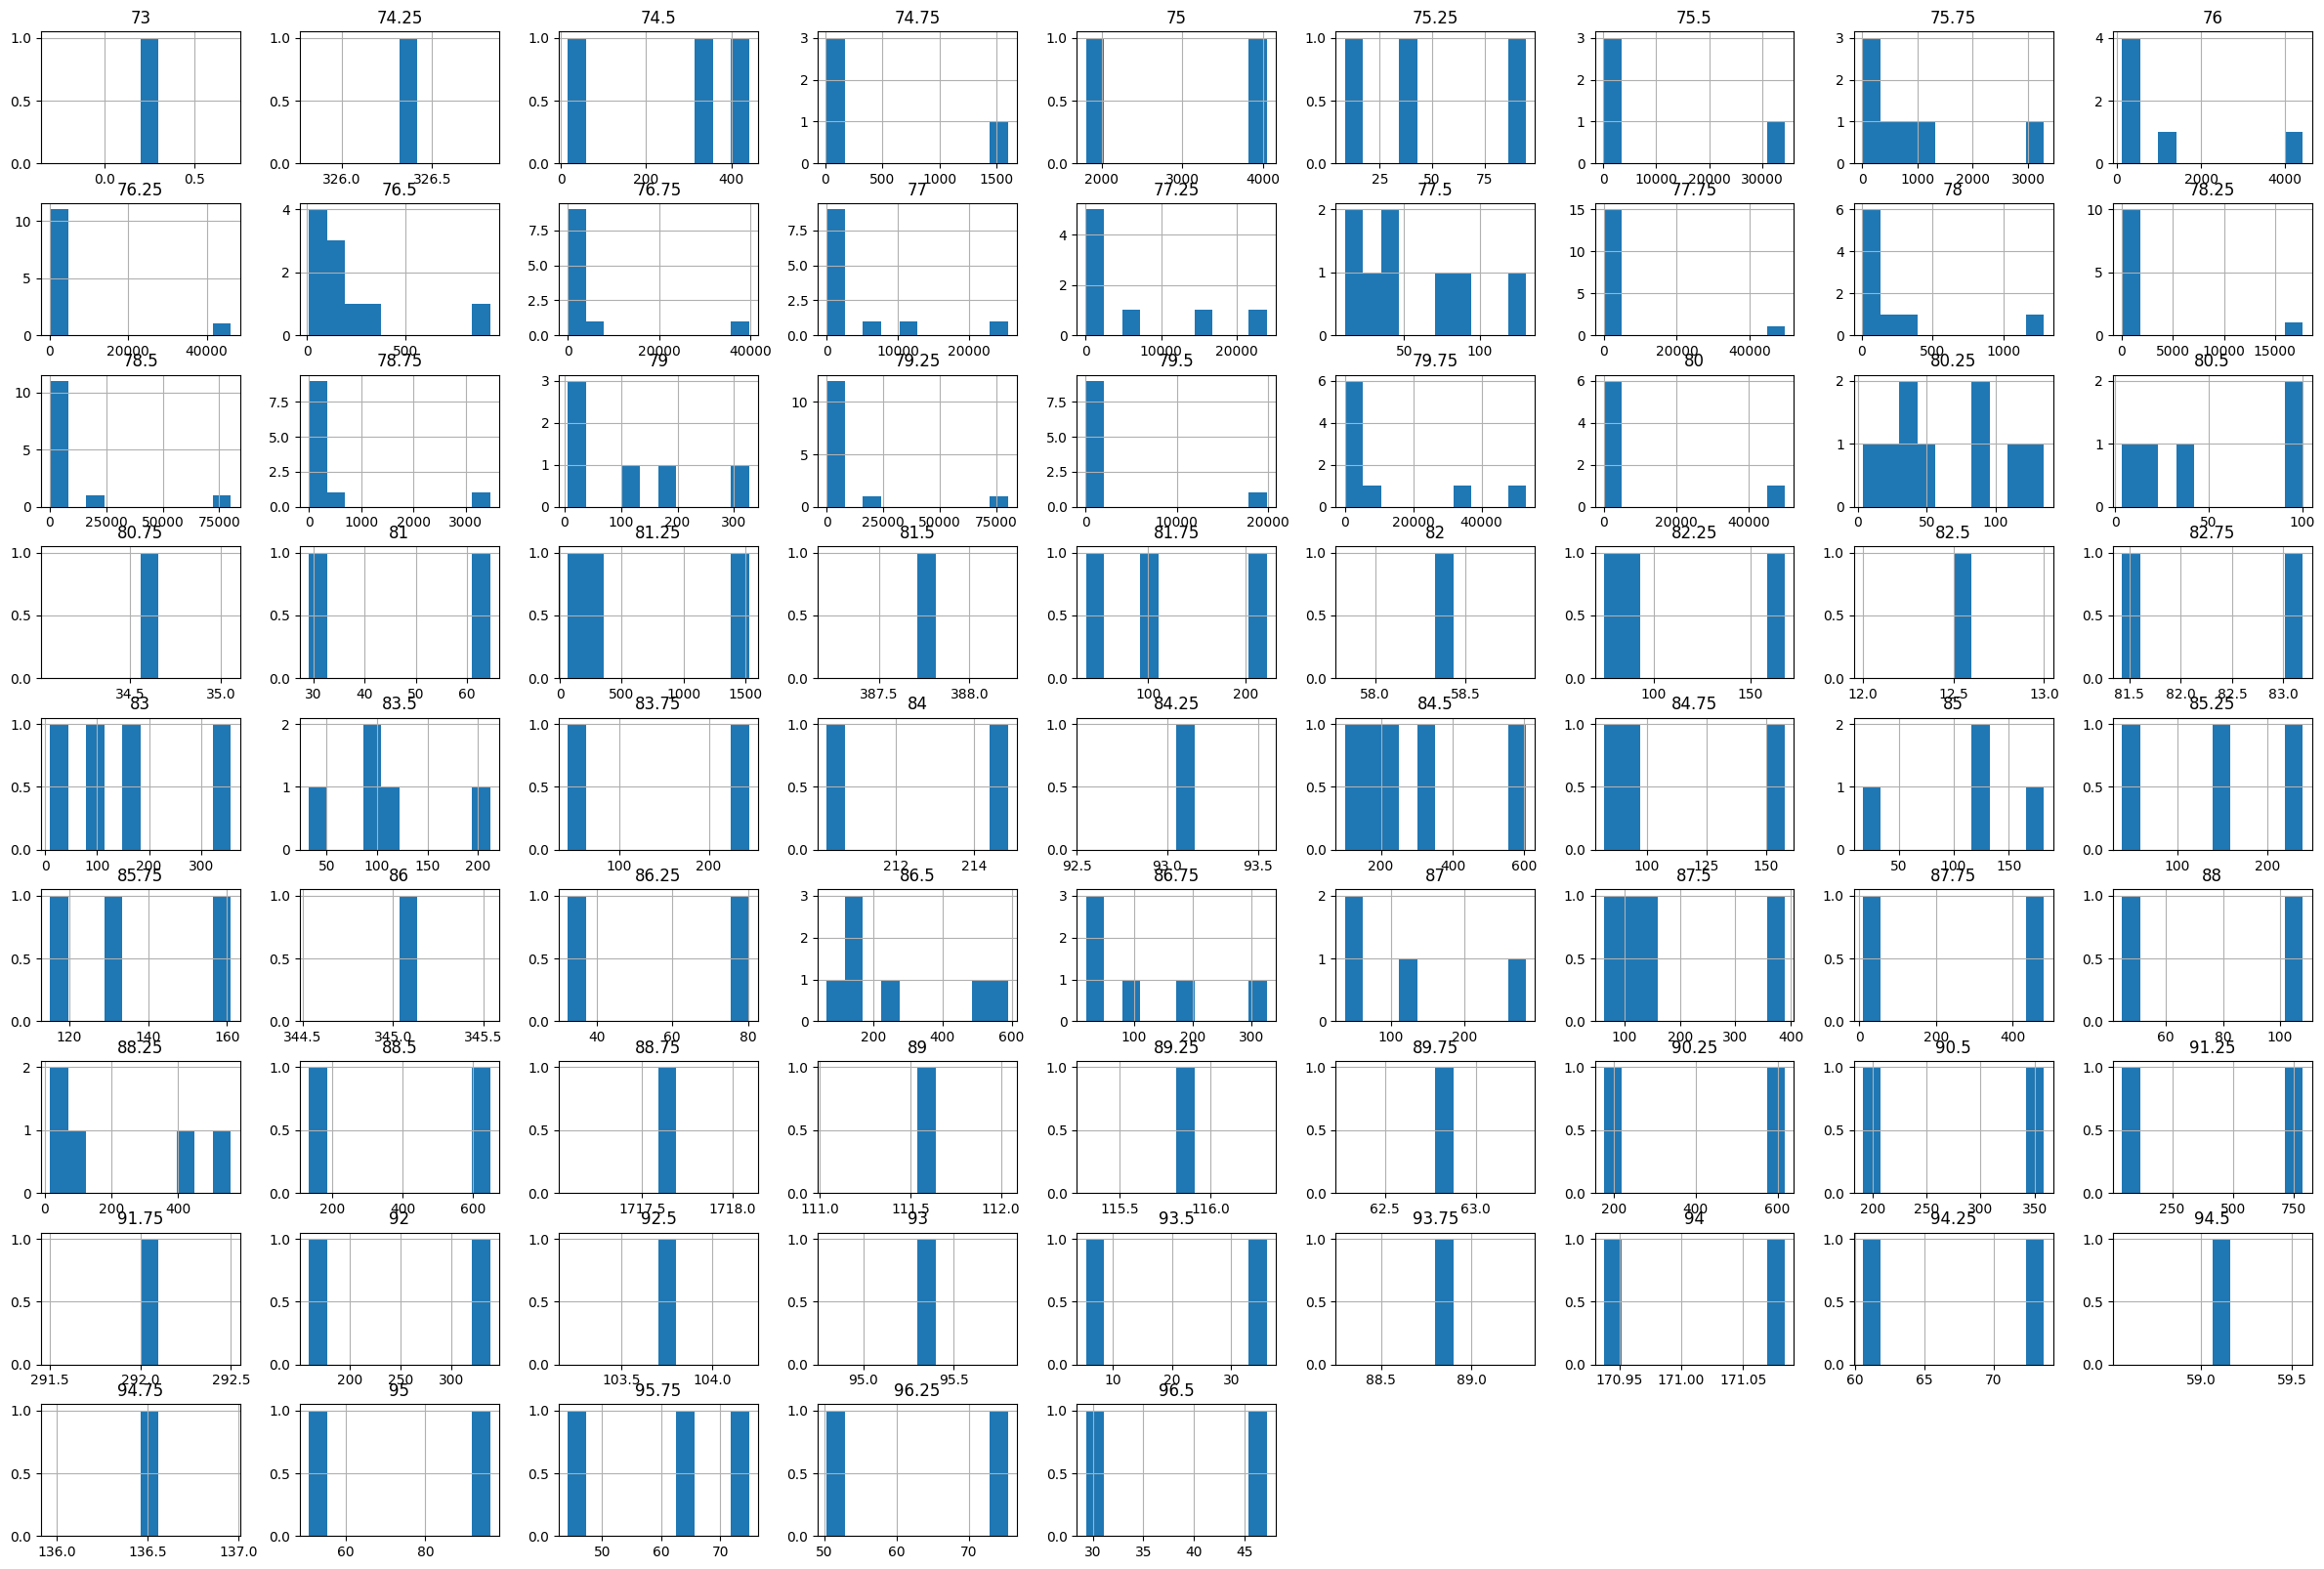

In [ ]:
df_nans.hist(figsize=(30, 20))
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_data = scaler.fit_transform(df.drop('Unnamed: 0', axis = 1))

In [ ]:
BUFFER_SIZE = 900000
BATCH_SIZE = 128
train_dataset = tf.data.Dataset.from_tensor_slices(train_data).shuffle(BUFFER_SIZE).batch(BATCH_SIZE, drop_remainder=True)

# Building the GAIN

Define the Generator

In [ ]:
def generator_builder(num_fet = 80):
  # 80 * 2 = 162
  generator = keras.models.Sequential([
    keras.layers.Input(shape = num_fet * 2),
    keras.layers.Dense(150, 'relu'),
    keras.layers.Dense(100, 'relu'),
    keras.layers.Dense(80, 'sigmoid')
  ])
  return generator

Define the Discriminator

In [ ]:
def discriminator_builder(num_fet = 80):
  # 80 * 2 = 162
  discriminator = keras.models.Sequential([
      keras.layers.Input(shape = num_fet * 2),
      keras.layers.Dense(150, 'relu'),
      keras.layers.Dense(100, 'relu'),
      keras.layers.Dense(80, 'sigmoid'),
  ])

  return discriminator

Discriminarot Loss

In [ ]:
def discriminator_loss(m, m_hat):
  temp = tf.math.multiply(m, tf.math.log(m_hat + 1e-8))
  temp += tf.math.multiply(tf.ones_like(m) - m , tf.math.log(tf.ones_like(m_hat) - m_hat + 1e-8))
  return -tf.reduce_mean(temp)

Generator Loss



In [ ]:
def generator_loss(m, m_hat, x, x_hat, alpha = 10):
  loss = -tf.math.multiply((tf.ones_like(m)-m), tf.math.log(m_hat+1e-8))
  loss += alpha * tf.multiply(m, (x - x_hat) ** 2)
  return tf.reduce_mean(loss)

In [ ]:
def hint_smapler(batch_size = 128, num_fet = 80, hint_rate = 0.9):
    A = np.random.uniform(0., 1., size = [batch_size, num_fet])
    B = hint_rate > A
    C = 1.*B
    return C

Define the Optimizers and build the models

In [ ]:
generator_optimizer = keras.optimizers.SGD(1e-4)
discriminator_optimizer = keras.optimizers.SGD(1e-4)

In [ ]:
generator = generator_builder()
discriminator = discriminator_builder()

In [ ]:
@tf.function
def train_step(batch, epoch_num):
  m = tf.where(tf.math.is_nan(batch), tf.zeros_like(batch), tf.ones_like(batch))
  batch_C = tf.where(tf.math.is_nan(batch), tf.zeros_like(batch), batch)
  z = np.random.uniform(0, 0.01, size = batch.shape)
  batch = tf.math.multiply(batch_C, m) + tf.math.multiply((tf.ones_like(m) - m), z)

  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:

    X_temp = tf.cast(generator(tf.concat([batch, m], 1), training = True), tf.float64)
    X_hat = tf.math.multiply(m, batch) + tf.math.multiply((tf.ones_like(m) - m), X_temp)

    H = tf.math.multiply(hint_smapler(),  m)
    M_hat = tf.cast(discriminator(tf.concat([X_hat, H], 1), training = True), tf.float64)

    disc_loss = discriminator_loss(m, M_hat)
    gen_loss = generator_loss(m, M_hat, batch, X_hat, alpha = 10)

  gen_grad = gen_tape.gradient(gen_loss, generator.trainable_variables)
  disc_grad = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
  generator_optimizer.apply_gradients(zip(gen_grad, generator.trainable_variables))
  discriminator_optimizer.apply_gradients((zip(disc_grad, discriminator.trainable_variables)))
  return gen_loss, disc_loss

In [ ]:
def train(dataset, EPOCHS):

  losses_gen = []
  losses_disc  = []
  for epoch in range(1, EPOCHS+1):
    print(f'Epoch {epoch} / {EPOCHS}:', end=' ')
    t0 = time.time()
    for batch in dataset:
      gen_loss, disc_loss = train_step(batch, epoch)
      losses_gen.append(gen_loss)
      losses_disc.append(disc_loss)
    t1 = time.time()
    print(f'ge_loss = {gen_loss}, dis_loss = {disc_loss}, time = {t1 - t0}')
  return losses_gen, losses_disc

In [ ]:
gen_loss, disc_loss = train(train_dataset, EPOCHS = 10)

Epoch 1 / 10: 

UnboundLocalError: ignored

In [ ]:
plt.figure(figsize = (20, 10))
plt.plot(gen_loss, color = 'orange')
plt.title('Generator Loss')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

In [ ]:
plt.figure(figsize = (20, 10))
plt.plot(disc_loss, color = 'orange')
plt.title('Disciriminator Loss')
plt.xlabel('Iter')
plt.ylabel('Loss')
plt.show()

In [ ]:
m = tf.where(tf.math.is_nan(train_data), tf.zeros_like(train_data), tf.ones_like(train_data))
train_data_C = tf.where(tf.math.is_nan(train_data), tf.zeros_like(train_data), train_data)
z = np.random.uniform(0, 0.01, size = train_data.shape)
train_data = tf.math.multiply(train_data_C, m) + tf.math.multiply((tf.ones_like(m) - m), z)

In [ ]:
X_temp = tf.cast(generator(tf.concat([train_data, m], 1), training = True), tf.float64)
X_hat = tf.math.multiply(m, train_data) + tf.math.multiply((tf.ones_like(m) - m), X_temp)

In [ ]:
pred = scaler.inverse_transform(X_hat)
df_ = df.drop(['Unnamed: 0'], axis = 1)
test = []
for idx_col, col in enumerate(df):
  for idx_row, row in enumerate(df.loc[:, col]):
    if np.isnan(row):
      test.append(f'{idx_row}-{col}')
res = []
for col_idx, col in enumerate(df_):
  for row_idx, row in enumerate(df_.loc[:, col]):
    if np.isnan(row):
      res.append(pred[row_idx, col_idx])

In [ ]:
out = np.array([test, res])
out = pd.DataFrame(out.T)
out = out.rename({0: 'row-col', 1: 'value'}, axis = 1)
out.to_csv('sub3_temp.csv', index = False)